# Terminal EELS preprocessing:
Daniel del-Pozo Bueno

University of Barcelona

20/07/2022

In the context of the PhD Thesis C

## Libraries:

In [1]:
import hyperspy.api as hs
import pickle 
from time import time
import pandas as pd
import copy as cp
import joblib
import numpy as np
import os
import math as ma
#Matplotlib
import matplotlib.pyplot as plt 
import sklearn 
from sklearn.decomposition import PCA

## File location: 

In [ ]:
file_location = 'C:\Users\dpb52\Desktop\2022_Tesis\2022_07_Alicia_EMPA'

SyntaxError: unterminated string literal (detected at line 1) (2568460066.py, line 1)

In [10]:
# Indicas la direccion donde tienes las imagenes:
os.chdir(file_location)

FileNotFoundError: [WinError 2] El sistema no puede encontrar el archivo especificado: 'C:/Users/dpb52/Desktop/2022_Alicia_EMPA'

## Load data:

In [14]:
SI1 = hs.load('EELSDataCube_09.rpl')

#### Visualize data: 

In [23]:
#%matplotlib qt
SI1.plot()

## PCA:

#### Remove spikes: 

In [17]:
SI1.spikes_removal_tool()

#### Get decomposition:

In [16]:
#Apply PCA:
SI1.data[SI1.data<0]=0
SI1.decomposition(True)

Decomposition info:
  normalize_poissonian_noise=True
  algorithm=SVD
  output_dimension=None
  centre=None


#### Evaluate the PCA: 

<AxesSubplot:title={'center':'\nPCA Scree Plot'}, xlabel='Principal component index', ylabel='Proportion of variance'>

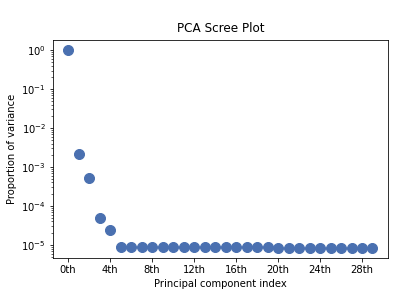

In [17]:
%matplotlib inline
SI1.plot_explained_variance_ratio()

In [18]:
%matplotlib qt
SI1.plot_decomposition_results()

#### Get the denoise signal: 

In [19]:
pca_si1 = SI1.get_decomposition_model([0,1,2,3,4,5])

In [24]:
pca_si1.plot()

## Remove background:

##### oxygen region:

In [73]:
#Energy range of background removal
a = 460
b = 505
a = np.float64(a)
b = np.float64(b)

In [74]:
final_spectrum_1 = pca_si1.remove_background(signal_range=(a,b),fast=True)

In [75]:
final_spectrum_1.plot()

##### manganese region:

In [99]:
#Energy range of background removal
a = 550
b = 615
a = np.float64(a)
b = np.float64(b)

In [100]:
final_spectrum_2 = pca_si1.remove_background(signal_range=(a,b),fast=True)

In [101]:
final_spectrum_2.plot()

## Deconvolution:

In [ ]:
# You need the zero loss peak (zlp) from the same spatial region to properly deconvolve. 
SI_deconvolved = SI_core_loss.fourier_log_deconvolution(SI_zlp)

  0%|          | 0/288 [00:00<?, ?it/s]

  0%|          | 0/288 [00:00<?, ?it/s]

## Crop in energy:

In [79]:
#Energy range to crop spectra
c = 500.
d = 654.

In [80]:
cropped_1 = final_spectrum_1.isig[c:d]

In [81]:
%matplotlib qt
cropped_1.plot()

In [105]:
#Energy range to crop spectra
c = 575.
d = 654.

In [106]:
cropped_2 = final_spectrum_2.isig[c:d]

In [107]:
%matplotlib qt
cropped_2.plot()

## Crop in space:

## Save data in hdf5:

In [85]:
cropped_1.save('SI_EELS_09_oxygen.hdf5')

In [108]:
cropped_2.save('SI_EELS_09_whitelines.hdf5')

Overwrite 'C:\Users\dpb52\Desktop\2022_Alicia\SI_EELS_09_whitelines.hdf5' (y/n)?
 y
